# Cross-entropy (CE) Method Test

## CE method test 1
The distribution in CE method directly fits the f-value, in this approach, the f-value has to be the directly fitted by the cem, it cannot depend on other parameters. But it works! How to prove the convergence?

In [5]:
# cem test 1
# cem directly fits the f-value, in this approach, the f has to be the direct
# values fitted by the cem, it cannot depend on other parameters. But it works!
import numpy as np
N=100 # number of samples
ratio=0.1 # ratio of selection
num_itr=50
samples = np.random.normal(0,1,N)  # f-value: from a normal distribution
print('true min: ', np.min(samples))
for i in range(num_itr):
    # sample and select top 10% (max [-a:]or min [:a])
    selected_samples = samples[np.array(samples).argsort()[:int(N*ratio)]]
#     selected_samples = samples[np.array(samples).argsort()[-int(N*ratio):]]
    m=np.mean(selected_samples)
    std=np.std(selected_samples)
    # fit the gaussian
    samples=np.random.normal(m, std, N)
print(selected_samples)

('true min: ', -2.921757706470594)
[-3.05239919 -3.05239919 -3.05239919 -3.05239919 -3.05239919 -3.05239919
 -3.05239919 -3.05239919 -3.05239919 -3.05239919]


Results from above: 
* After CE iterations, the values close to the ture minimal of original samples or the f-distribution are finally sampled, which testifies directly fitting original f-value could work in some situations.
* And the standard deviation in the fitting Gaussian distribution of CE method decreases very fast actually. 
* The final sampled values are actually still not the true optimal value of the original distribution, just close to it. CE method actually cannot be accurate, because it always depends on the number of samples used for evaluation. The larger the number, the more accurate it is.　This method could be accurate to the infinite large limit number of samples, under the law of large numbers. 

## CE method test 2
The distribution of CE method fits the x of f(x). In this approach, the x can be parameters of 
the function f, therefore f can be dependent on other variables z like f(x,z). It works 
as long as there exists minimum of the function f.

('true min: ', 8.241945158007902e-05)
[4.55442613e-115 1.55757921e-113 3.13071712e-113 3.32578702e-113
 4.62277571e-113 5.19920956e-113 5.30794955e-113 5.45446403e-113
 5.59609879e-113 7.94580383e-113]


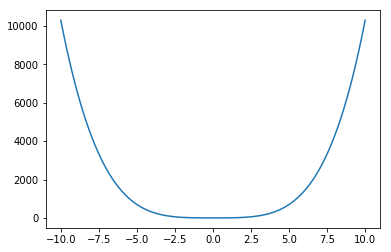

In [20]:
# cem test 2
# cem fits the x of f(x), in this approach, the x can be parameters of 
# the function f, therefore f can be dependent on other variables z like f(x,z). It works 
# as long as there are minimum of the function f.
import numpy as np
import matplotlib.pyplot as plt
N=100
ratio=0.1
num_itr=50

f=lambda x: 3*x**2+x**4  # function of f(x)
samples = np.random.normal(0,1,N) # x-value of f(x)
print('true min: ', np.min(f(samples)))
for i in range(num_itr):
    # sample and select top 10% (max [-a:]or min [:a])
    selected_samples = samples[np.array(f(samples)).argsort()[:int(N*ratio)]]
    m=np.mean(selected_samples)
    std=np.std(selected_samples)  # std decrease fastly
#     print(std)
    # fit the gaussian
    samples=np.random.normal(m, std, N)
print(f(selected_samples))

'''display the function f(x) '''
x=np.linspace(-10,10,N)
y=f(x)
plt.plot(x,y)
plt.show()


Additional results from above:
* CE method can also fit on the parameters of a function, like x of f(x), which actually indicates the fitting can be done on any parameterized variables of the original variable (as criteria value) for CE, and on any re-parameterized variables for the previous parameterized variables, ie:

    f->f(x)->f(g(z))->...
    
    where the Gaussian distribution can be fitted on f or x or z, ... respectively.

## Notes for applying CE method in practice:
* Although from above analysis, CE method can fit on any parameterized variables of the criteria function, there is actually a preference of CE method for which variables to fit on:

    First, the main idea of CE method is **to transform the original optimization problem**, which is on the criteria function, **to an associated stochastic problem in another space**, which is the parameterized variable space, **for applying the sampling-based iterative method to get the optimum in original criteria function**.
    
    And the reason of applying this transformation is that **if directly applying the sampling-based interative evaluation on original criteria value function (like in CE method test 1), the probability of drawing a higg-valued smaple is presumably very low**, therefore finding the optimal samples from naive sampling is intractable. This is for the case that the criteria function is highly complicated and non-convex.
    
    Therefore, the sampling space transformation is to make the probability of drawing high-valued (criteria value) samples larger than direcly drawing from the criteria function. How to guarantee that, w.r.t. the transformation function?
    
    **So a linear transformation will probabily not help with changing the map of distribution/function values, therefore not help with making the probability of sampling large criteria values,** like g(x)=w\*x+b.
    
    CE method also has disadvantages in **sensitivity to initialization of the Gaussian distribution**. A non-proper initialization could make CE method converge to local optimum easily. For example, in algorithm QT-Opt, if CE method isn't initialized properly, the several optimum reached by different runnings of CE method for the same case could make the Q-network applying CE not converge.
    
    


## Noisy CE method
Simply adding an off-set on the standard deviation term in distribution of CE method to prevent it from decreasing too fast. It is basically a boosting of exploration.

('true min: ', 0.0003412901149159018)
[0.00034129 0.00346261 0.0039516  0.00562357 0.01831646 0.02385421
 0.02464838 0.02520516 0.03229293 0.03421347]
[0.0001847  0.00044797 0.0006746  0.00076897 0.00079741 0.00105112
 0.00106451 0.00110887 0.00120241 0.00142378]
[1.03419228e-06 2.38243375e-06 3.90924894e-05 7.79811514e-05
 8.99536363e-05 1.59339597e-04 1.61820122e-04 1.71939323e-04
 2.71328281e-04 2.83190690e-04]
[1.39912707e-06 9.08494517e-06 2.40212221e-05 3.15651967e-05
 1.42864904e-04 3.03949594e-04 4.55235702e-04 4.92096930e-04
 5.96491898e-04 6.13972094e-04]
[3.35399938e-06 1.21945547e-05 1.25835656e-05 2.18142469e-05
 2.99596319e-05 9.00015199e-05 1.21487414e-04 1.87495442e-04
 2.11307611e-04 2.60249908e-04]
[1.12668277e-06 1.79999886e-05 3.97441648e-05 6.02497161e-05
 9.23291935e-05 9.79880099e-05 9.92044171e-05 1.81352091e-04
 2.42245264e-04 2.73295046e-04]
[6.50466348e-07 4.40883648e-05 6.78813587e-05 1.04186431e-04
 1.50469673e-04 1.79026235e-04 1.93043327e-04 2.08465794e-0

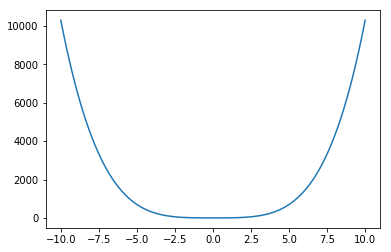

In [22]:
# constant noise on std
import numpy as np
import matplotlib.pyplot as plt
N=100
ratio=0.1
num_itr=50
std_noise = 0.1

f=lambda x: 3*x**2+x**4  # function of f(x)
samples = np.random.normal(0,1,N) # x-value of f(x)
print('true min: ', np.min(f(samples)))
for i in range(num_itr):
    # sample and select top 10% (max [-a:]or min [:a])
    selected_samples = samples[np.array(f(samples)).argsort()[:int(N*ratio)]]
    m=np.mean(selected_samples)
    std=np.std(selected_samples)+std_noise  # constant noise on std
#     print(std)
    # fit the gaussian
    samples=np.random.normal(m, std, N)
    print(f(selected_samples))

'''display the function f(x) '''
x=np.linspace(-10,10,N)
y=f(x)
plt.plot(x,y)
plt.show()


('true min: ', 9.848678761433567e-05)
0.16098619064378178
[9.84867876e-05 2.05477238e-04 1.16920654e-03 2.05328101e-03
 5.52646690e-03 5.77471848e-03 1.47582847e-02 1.58134710e-02
 3.55514899e-02 4.06655378e-02]
0.11460017007264803
[1.52200969e-06 1.81824287e-04 4.30198218e-04 1.02625256e-03
 1.09172702e-03 1.16851665e-03 1.36434360e-03 1.50257194e-03
 1.59505580e-03 1.71016474e-03]
0.10316136007950855
[2.78924072e-06 2.92469716e-06 4.57427452e-06 1.15947573e-05
 5.88072233e-05 1.81596884e-04 2.02885092e-04 2.14681729e-04
 4.90750063e-04 5.47463261e-04]
0.10097706158161131
[1.05558571e-05 1.08541522e-05 3.87355124e-05 5.96325516e-05
 1.09972605e-04 1.75154079e-04 1.95055772e-04 2.14747638e-04
 3.41215753e-04 4.17070325e-04]
0.09911446576625192
[2.67139142e-06 8.22362352e-06 2.08395990e-05 6.59411849e-05
 8.88284682e-05 1.52864573e-04 2.05977949e-04 2.58289207e-04
 3.72801780e-04 4.08436004e-04]
0.09405478058787772
[8.36932167e-07 1.79258593e-05 1.87011384e-05 3.25031282e-05
 6.55060560

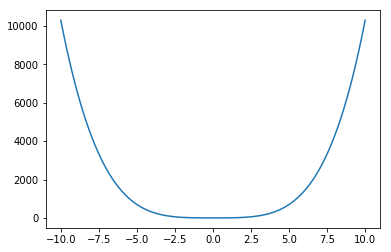

In [23]:
# decreasing noise on std
import numpy as np
import matplotlib.pyplot as plt
N=100
ratio=0.1
num_itr=50
std_noise = 0.1

f=lambda x: 3*x**2+x**4  # function of f(x)
samples = np.random.normal(0,1,N) # x-value of f(x)
print('true min: ', np.min(f(samples)))
for i in range(num_itr):
    # sample and select top 10% (max [-a:]or min [:a])
    selected_samples = samples[np.array(f(samples)).argsort()[:int(N*ratio)]]
    m=np.mean(selected_samples)
    std=np.std(selected_samples)+std_noise*(num_itr-i)/num_itr  # decreasing noise on std
    print(std)
    # fit the gaussian
    samples=np.random.normal(m, std, N)
    print(f(selected_samples))

'''display the function f(x) '''
x=np.linspace(-10,10,N)
y=f(x)
plt.plot(x,y)
plt.show()

Results: the noise on std actually delays the convergence process of CE method and makes it more explorative.